___
# <font color= #d4b1e6> **Proyecto 1: MNIST** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Sarah Lucía Beltrán, Priscila Cervantes Ramírez, Mónica Ibarra Herrera & Antonia Horburger` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Aprendizaje Máquina` </font>
___

A continuación, se trabajará con el dataset de Fashion-MNIST, un dataset que contiene imágenes de 10 diferentes clases de prendas, cuenta con 60,000 imágenes de entrenamiento y 10,000 de prueba.

Se utlizarán 5 diferentes modelos para clasificar entre las 10 clases de prendas que contiene el dataset:

- Regresión Logística
- Support Vector Machine (SVM)
- Random Forest
- Redes Neuronales (MLP)
- CNN


*Librerías a utlizar*

In [2]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

*Importación de los datos*

In [3]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Visualizar algunas imágenes*

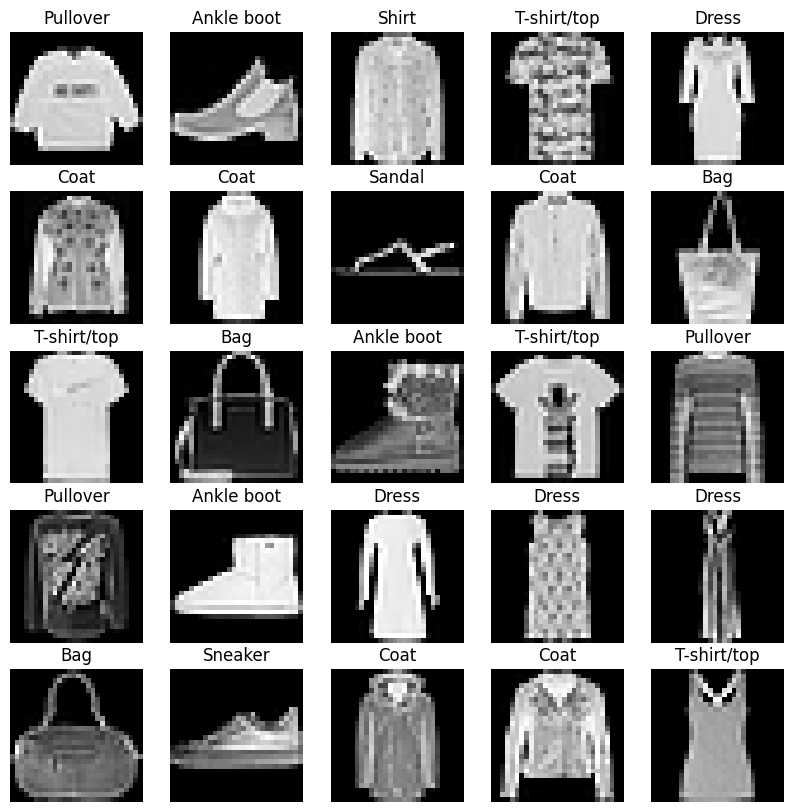

In [4]:
X = df_train.drop("label", axis=1).values
y = df_train["label"].values

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10,10))
for i in range(25):
    img = X[i].reshape(28,28)   # Reconstruir la imagen 28x28
    plt.subplot(5,5,i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(class_names[y[i]])
plt.show()


*División de entrenamiento y prueba*

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Estandarización*

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

*PCA*

In [7]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

## <font color= #d4b1e6> **Regresión Logística** </font>

## <font color= #d4b1e6> **SVM** </font>

In [11]:
svm_clf = SVC(kernel="rbf", random_state=42)
svm_clf.fit(X_train_pca, y_train)

SVC(random_state=42)

*Métricas de desempeño*

In [12]:
# Métricas de desempeño
y_pred_svm = svm_clf.predict(X_val_pca)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

Exactitud (Accuracy): 0.8820
Precisión (Precision): 0.8822
Sensibilidad (Recall): 0.8835
F1-Score: 0.8824


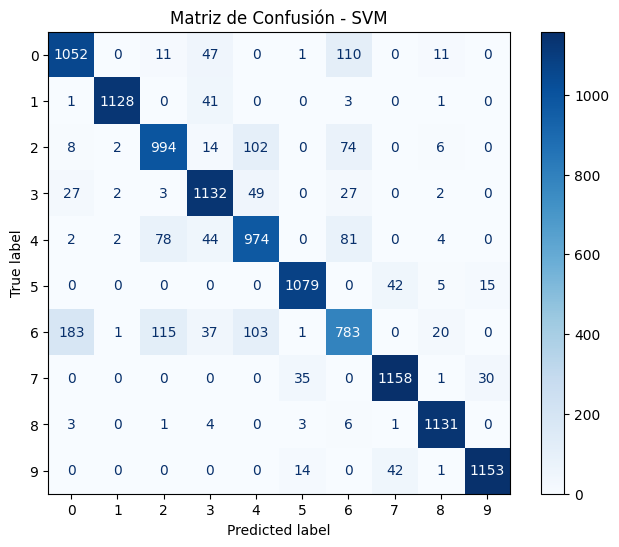

In [13]:
# Matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_clf.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusión - SVM")
plt.show()

## <font color= #d4b1e6> **Random Forest** </font>

## <font color= #d4b1e6> **Redes Neuronales MLP** </font>

## <font color= #d4b1e6> **CNN** </font>